In [1]:
import pandas as pd
import json
import csv, os, pathlib, pprint, numpy as np

In [2]:
import re
import string
import time
import json
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation as cv
from pandas import DataFrame
from collections import OrderedDict

/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_directory = os.path.join(os.getcwd(), "data")
train_data_file_path = os.path.join(data_directory, "train.json")
with open(train_data_file_path, 'r') as f:
    train_data = json.load(f)
print(len(train_data))  

39774


In [4]:
"""
Stores the cuisines and ingredients in separate variables (w/ duplicates).
"""

all_cuisines = []
all_ingredients = []

for recipe in train_data:
    all_cuisines.append(recipe['cuisine'])
    all_ingredients.extend(recipe['ingredients'])
    
all_cuisines = np.array(all_cuisines)
all_ingredients = np.array(all_ingredients)

In [5]:
"""
Isolates only unique cuisines and ingredients and sort them alphabetically.
"""

unique_cuisines, cuisine_counts = np.unique(all_cuisines, return_counts=True)
unique_ingredients, ingredient_counts = np.unique(all_ingredients, return_counts=True)

In [6]:
print(len(unique_cuisines))

20


In [7]:
"""
List of unique cuisines.
"""

for cuisine in unique_cuisines:
    print(cuisine)

brazilian
british
cajun_creole
chinese
filipino
french
greek
indian
irish
italian
jamaican
japanese
korean
mexican
moroccan
russian
southern_us
spanish
thai
vietnamese


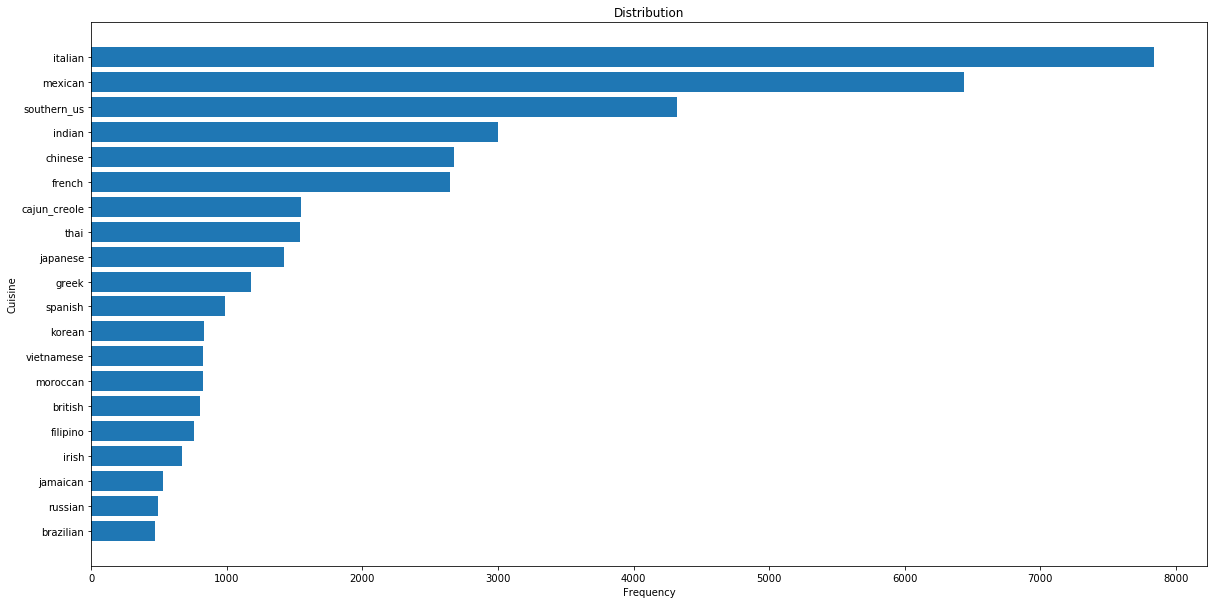

In [8]:
"""
Explore cuisine frequency in the dataset.
"""

# Sort the cuisines by frequency.
cuisine_counts, unique_cuisines = zip(*sorted(zip(cuisine_counts, unique_cuisines)))

# Plot the frequencies.
pos = np.arange(len(unique_cuisines)) + 0.5
plt.figure(figsize=(20, 10))
plt.barh(pos, cuisine_counts, align='center')
plt.yticks(pos, unique_cuisines)
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Distribution')
plt.show()

In [11]:
for i in range(50):
    print(unique_ingredients[i])

(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese
1% low-fat milk
2 1/2 to 3 lb. chicken, cut into serving pieces
2% low fat cheddar chees
2% low-fat cottage cheese
2% lowfat greek yogurt
2% milk shredded mozzarella cheese
2% reduced-fat milk
25% less sodium chicken broth
33% less sodium cooked deli ham
33% less sodium cooked ham
33% less sodium ham
33% less sodium smoked fully cooked ham
40% less sodium taco seasoning
40% less sodium taco seasoning mix
7 Up
8 ounc ziti pasta, cook and drain
95% lean ground beef
A Taste of Thai Rice Noodles
Accent Seasoning
Adobo All Purpose Seasoning
Alaskan king crab legs
Alexia Waffle Fries
Alfredo sauce
Amarena cherries
Amaretti Cookies
American cheese
Anaheim chile
Angostura bitters
Argo Corn Starch
Asian chili

In [12]:
print(len(unique_ingredients))

6714
